# Hacking Food & Nutrition : Team Harvey Wiley

## Topic: Tenatative, pertaining to Uganda

## Goals: 

List TBD

## Table of Contents: 
* [(A) Choice of a dataset](#population)
* [(A) Estimate Demand System](#demand)

### Setup

In [1]:
!pip install -r requirements.txt
import numpy as np
import pandas as pd
from eep153_tools.sheets import read_sheets

  Using cached CFEDemands-0.5.4-py2.py3-none-any.whl (47 kB)
  Using cached ConsumerDemands-0.4.1.dev0-py2.py3-none-any.whl (12 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
  Using cached python_gnupg-0.5.0-py2.py3-none-any.whl (18 kB)
  Using cached xarray-2023.4.2-py3-none-any.whl (979 kB)
  Using cached dvc-2.55.0-py3-none-any.whl (419 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached ray-2.3.1-cp39-cp39-manylinux2014_x86_64.whl (58.6 MB)
  Using cached pandas-2.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pathspec-0.11.1-py3-none-any.whl (29 kB)
  Using cached dvc_http-2.30.2-py3-none-any.whl (12 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
  Using cached dvc_render-0.3.1-py3-none-any.whl (18 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cache

## (A) Choice of a dataset (and data setup) <a class="anchor" id="population"></a>

In [12]:
Uganda_Dataog = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'

In [3]:
# Import whole Google Sheet
Uganda_Data = "1mo_bNlLJ-M6yQDDdUxvDnvBc-Hs2nZcEuxJ59CCYgWA"

#Note: created another Google Sheet, w/ more detailed labels, link available below
# https://docs.google.com/spreadsheets/d/1mo_bNlLJ-M6yQDDdUxvDnvBc-Hs2nZcEuxJ59CCYgWA/edit#gid=1174957327

In [4]:
# Divide expenditure in different years

# Missing expnditure data between 2012-2013  and 2014-2015
Expenditure_2011 = read_sheets(Uganda_Data,sheet = 'Expenditures (2011-2012)')
Expenditure_2013 = read_sheets(Uganda_Data,sheet = 'Expenditures (2013-2014)')
Expenditure_2015 = read_sheets(Uganda_Data,sheet = 'Expenditures (2015-2016)')

# Input price table
Price =  read_sheets(Uganda_Data,sheet = 'Prices')

# Replace the 'na' valyes w/ '0'
Expenditure_2011 = Expenditure_2011.replace(np.nan,0)
Expenditure_2013 = Expenditure_2013.replace(np.nan,0)
Expenditure_2015 = Expenditure_2015.replace(np.nan,0)
Price = Price.replace(np.nan,0)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [5]:
# Create Food List 
food_list = ['Beans','Beef','Beer','Biscuits','Bongo','Bread',
             'Butter','Cabbages','Cake','Cassava','Cassava (flour)',
             'Chapati','Cheese','Chicken','Cigarettes','Coffee','Cooking Oil',
             'Cornflakes','Dodo','Donut','Eggs','Fish (dried)','Fish (fresh)',
             'Garlic','Ghee','Ginger','Goat','Ground Nuts','Honey','Ice Cream',
             'Infant Formula','Irish Potatoes','Jackfruit','Jam/Marmalade',
             'Kabalagala','Macaroni/Spaghetti','Maize','Mangos','Matoke','Milk (fresh)',
             'Milk (powdered)','Millet','Onions','Oranges','Other Alcohol','Other Drinks',
             'Other Fruits','Other Juice','Other Meat','Other Spices','Other Tobacco','Other Veg.',
             'Passion Fruits','Peas','Plantains','Pork','Rice','Salt','Samosa','Sim Sim','Soda',
             'Sorghum','Soybean','Sugar','Sugarcane','Sweet Bananas','Sweet Potatoes','Tea','Tomatoes',
             'Waragi','Water','Wheat (flour)','Yam','Yogurt']

In [6]:
#Filtering price data

# Filter price data for 2011-12
Price_data_2011 = Price[Price['t'] == '2011-12']
#Price_data_2011

# Filter price data for 2013-14
Price_data_2013 = Price[Price['t'] == '2013-14']
#Price_data_2013

# Filter price data for 2015-16
Price_data_2015 = Price[Price['t'] == '2015-16']
#Price_data_2015


In [7]:
#Merge price & expenditure data

#Price_data_2011 Expenditure_2011
merged_data_2011 = pd.merge(Expenditure_2011,Price_data_2011, on=['t', 'Market'], suffixes=('_expenditure', '_price'))
#merged_data_2011

#Price_data_2013 Expenditure_2013
merged_data_2013 = pd.merge(Expenditure_2013,Price_data_2013, on=['t', 'Market'], suffixes=('_expenditure', '_price'))
#merged_data_2013

#Price_data_2015 Expenditure_2015
merged_data_2015 = pd.merge(Expenditure_2015,Price_data_2015, on=['t', 'Market'], suffixes=('_expenditure', '_price'))
#merged_data_2015

In [8]:
#Consumption Tables 

food_columns = food_list
for food in food_columns:
    merged_data_2011[food + '_consumption'] = merged_data_2011[food + '_expenditure'] / merged_data_2011[food + '_price']

# replace na to 0
merged_data_2011 = merged_data_2011.replace(np.nan,0)

# keep ID, t, Market
columns_to_keep = ['ID', 't', 'Market']

# add consumption columns to the list
for food in food_columns:
    columns_to_keep.append(food + '_consumption')

# create a new dataframe with only the selected columns
consumption_data_2011 = merged_data_2011[columns_to_keep]
print("2011-12 Consumption")
consumption_data_2011

2011-12 Consumption


,ID,t,Market,Beans_consumption,Beef_consumption,Beer_consumption,Biscuits_consumption,Bongo_consumption,Bread_consumption,Butter_consumption,...,Sugarcane_consumption,Sweet Bananas_consumption,Sweet Potatoes_consumption,Tea_consumption,Tomatoes_consumption,Waragi_consumption,Water_consumption,Wheat (flour)_consumption,Yam_consumption,Yogurt_consumption
0,1013000201,2011-12,Central,0.000000,0.000000,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.190198,0.083333,2.040000,0.0,0.0,0.0,0.0,0.0
1,1013000202,2011-12,Central,3.714286,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.904317,0.416667,1.224000,0.0,0.0,0.0,0.0,0.0
2,1013000204,2011-12,Central,0.342857,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.570595,0.250000,1.020000,0.0,0.0,0.0,0.0,0.0
3,1013000206,2011-12,Central,6.285714,0.933333,0.0,0.0,0.0,0.3,0.0,...,0.0,0.0,3.570595,0.333333,1.224000,0.0,0.0,0.0,0.0,0.0
4,1013000210,2011-12,Central,0.571429,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.408000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,3213003007,2011-12,Northern,4.200000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2782,3213003008,2011-12,Northern,3.600000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.571429,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0
2783,321300300802,2011-12,Northern,0.800000,0.571429,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.142857,0.200000,2.666667,0.0,0.0,0.0,0.0,0.0
2784,3213003009,2011-12,Northern,3.600000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.714286,0.100000,2.666667,0.0,0.0,0.0,0.0,0.0


In [9]:
food_columns = food_list
for food in food_columns:
    merged_data_2013[food + '_consumption'] = merged_data_2013[food + '_expenditure'] / merged_data_2013[food + '_price']

# replace na to 0
merged_data_2013 = merged_data_2013.replace(np.nan,0)

# keep ID, t, Market
columns_to_keep = ['ID', 't', 'Market']

# add consumption columns to the list
for food in food_columns:
    columns_to_keep.append(food + '_consumption')

# create a new dataframe with only the selected columns
consumption_data_2013 = merged_data_2013[columns_to_keep]
print("2013-14 Consumption")
consumption_data_2013

2013-14 Consumption


,ID,t,Market,Beans_consumption,Beef_consumption,Beer_consumption,Biscuits_consumption,Bongo_consumption,Bread_consumption,Butter_consumption,...,Sugarcane_consumption,Sweet Bananas_consumption,Sweet Potatoes_consumption,Tea_consumption,Tomatoes_consumption,Waragi_consumption,Water_consumption,Wheat (flour)_consumption,Yam_consumption,Yogurt_consumption
0,1013000201,2013-14,Central,0.75,0.000000,0.0,0.0,0.0,0.457143,0.0,...,0.0,0.00,8.079208,0.0000,2.240000,0.0,0.0,0.0,0.0,0.0
1,1013000202,2013-14,Central,2.50,0.000000,0.0,0.0,0.0,0.071429,0.0,...,0.0,0.00,4.847525,0.0225,1.440000,0.0,0.0,0.0,0.0,0.0
2,1013000204,2013-14,Central,1.20,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,4.039604,0.0300,2.240000,0.0,0.0,0.0,0.0,0.0
3,1021000108,2013-14,Central,3.20,0.875000,0.0,0.0,0.0,1.028571,0.0,...,0.0,0.00,1.615842,0.0750,3.200000,0.0,0.0,0.0,0.0,0.0
4,1021000109,2013-14,Central,1.50,1.125000,0.0,0.0,0.0,0.514286,0.0,...,0.0,0.00,1.615842,0.0300,3.200000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,H40605-04-01,2013-14,Northern,0.25,0.285714,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.778032,0.0150,2.133333,0.0,0.0,0.0,0.0,0.0
3078,H40607-04-01,2013-14,Northern,0.50,0.571429,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.000000,0.0000,1.866667,0.0,0.0,0.0,0.0,0.0
3079,H40608-04-01,2013-14,Northern,1.30,0.000000,0.0,0.0,0.0,1.750000,0.0,...,0.0,0.60,0.778032,0.0300,4.000000,0.0,0.0,0.0,0.0,0.0
3080,H40609-04-01,2013-14,Northern,0.50,0.571429,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.24,0.000000,0.0000,2.666667,0.0,0.0,0.0,0.0,0.0


In [10]:
food_columns = food_list
for food in food_columns:
    merged_data_2015[food + '_consumption'] = merged_data_2015[food + '_expenditure'] / merged_data_2015[food + '_price']

# replace na to 0
merged_data_2015 = merged_data_2015.replace(np.nan,0)

# keep ID, t, Market
columns_to_keep = ['ID', 't', 'Market']

# add consumption columns to the list
for food in food_columns:
    columns_to_keep.append(food + '_consumption')

# create a new dataframe with only the selected columns
consumption_data_2015 = merged_data_2015[columns_to_keep]
print("2015-16 Consumption")
consumption_data_2015

2015-16 Consumption


,ID,t,Market,Beans_consumption,Beef_consumption,Beer_consumption,Biscuits_consumption,Bongo_consumption,Bread_consumption,Butter_consumption,...,Sugarcane_consumption,Sweet Bananas_consumption,Sweet Potatoes_consumption,Tea_consumption,Tomatoes_consumption,Waragi_consumption,Water_consumption,Wheat (flour)_consumption,Yam_consumption,Yogurt_consumption
0,1013000201,2015-16,Central,1.363636,1.000000,0.000000,0.0,0.0,0.571429,0.000000,...,0.0,0.000000,2.042553,0.0200,4.480000,0.0,0.0,0.0,0.0,0.0
1,1013000202,2015-16,Central,0.909091,0.000000,0.000000,0.0,0.0,0.228571,0.000000,...,0.0,0.000000,3.063830,0.0150,0.960000,0.0,0.0,0.0,0.0,0.0
2,1013000204,2015-16,Central,0.818182,0.000000,0.685714,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,2.042553,0.0100,1.280000,0.0,0.0,0.0,0.0,0.0
3,1013000210,2015-16,Central,0.000000,0.000000,1.508571,0.0,0.0,0.000000,0.000000,...,0.0,1.800000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1021000108,2015-16,Central,1.818182,1.111111,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0100,1.600000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,H38205-04-01,2015-16,Eastern,0.545455,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,5.294118,0.0150,1.863566,0.0,0.0,0.0,0.0,0.0
3212,H38206-04-01,2015-16,Eastern,0.795455,0.875000,0.000000,0.0,0.0,0.500000,0.144928,...,0.0,0.000000,0.000000,0.0225,2.608992,0.0,0.0,0.0,0.0,0.0
3213,H38208-04-01,2015-16,Eastern,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0300,2.608992,0.0,0.0,0.0,0.0,0.0
3214,H38209-04-01,2015-16,Eastern,0.000000,1.000000,0.000000,0.0,0.0,0.875000,0.000000,...,0.0,0.000000,0.000000,0.0150,2.236279,0.0,0.0,0.0,0.0,0.0


## (A) Estimate Demand System<a class="anchor" id="demand"></a>
Estimate a system of demands for different kinds of food. Characterize how consumption varies with household need.

In [29]:
x = read_sheets(Uganda_Dataog,sheet='Expenditures (2019-20)')
x.columns.name = 'j'
                 
# Change 'Uganda' to key of your own sheet in Sheets, above
d = read_sheets(Uganda_Dataog,sheet="HH Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
x = x.groupby('j',axis=1).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [ ]:
d.head()

In [15]:
y.head()

,,j,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,Cake,Cassava,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
i,t,m,,,,,,,,,,,,,,,,,,,,,
00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,8.188689,NaN,NaN,NaN,NaN,NaN,NaN,7.244228,NaN,8.699515,...,NaN,NaN,8.294050,5.298317,6.907755,NaN,NaN,NaN,8.006368,NaN
062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,6.907755,8.411833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.294050,...,NaN,NaN,NaN,NaN,6.684612,NaN,NaN,NaN,NaN,NaN
0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,7.937375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.070906,...,NaN,NaN,8.517193,5.298317,6.214608,NaN,NaN,NaN,NaN,NaN
1013000201,2019-20,Central,NaN,NaN,9.769956,NaN,NaN,NaN,NaN,NaN,NaN,8.294050,...,NaN,7.600902,NaN,5.991465,7.649693,NaN,NaN,NaN,NaN,NaN


In [16]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=30)

Missing dependencies for OracleDemands.


In [17]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]

In [18]:
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [19]:
from cfe import Regression

result = Regression(y=y,d=d)

In [20]:
result.predicted_expenditures()

i                                 t        m         j             
00c9353d8ebe42faabf5919b81d7fae7  2019-20  Eastern   Beans             3555.677276
                                                     Beef              8401.789558
                                                     Biscuits           842.091521
                                                     Bread             3077.266434
                                                     Cabbages          1199.255865
                                                                          ...     
e07bc322c4884559b4b8ca75c945dd3e  2019-20  Northern  Sweet Potatoes    6706.688800
                                                     Tea                201.911345
                                                     Tomatoes          1349.788766
                                                     Waragi            4423.328381
                                                     Yam               2839.871449
Length: 101010, dty

<IPython.core.display.Javascript object>


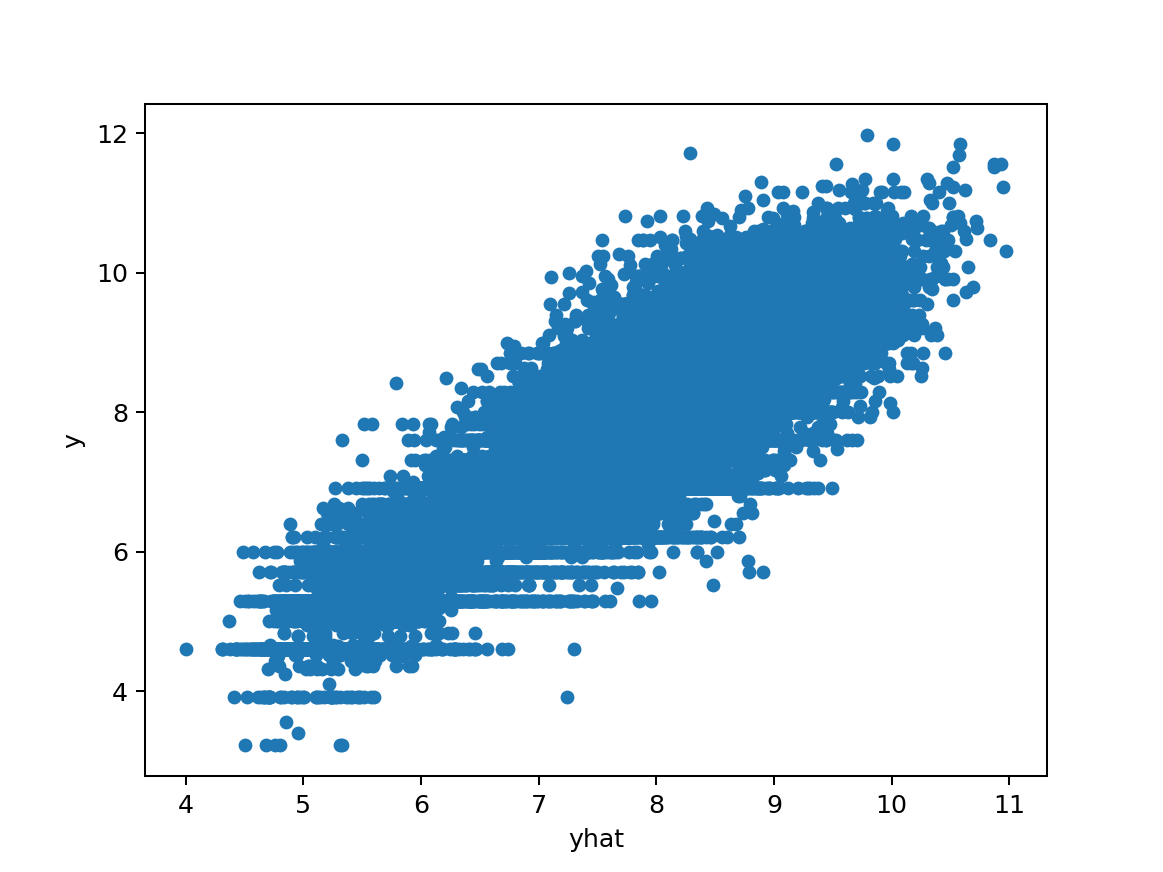

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [21]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

In [22]:
result.get_beta().sort_values()

j
Cassava           0.089645
Salt              0.104366
Millet            0.163091
Peas              0.221420
Beans             0.229586
Dodo              0.231391
Waragi            0.234374
Onions            0.234774
Sweet Potatoes    0.248343
Eggs              0.259851
Matoke            0.270251
Fish (dried)      0.283041
Cabbages          0.286388
Tea               0.295146
Beef              0.298503
Maize             0.299072
Cooking Oil       0.299955
Pork              0.301544
Ground Nuts       0.311495
Tomatoes          0.330459
Yam               0.353646
Rice              0.356148
Mangos            0.366501
Kabalagala        0.392616
Sim Sim           0.398601
Other Veg.        0.407817
Sweet Bananas     0.433388
Soda              0.453436
Chapati           0.456309
Bread             0.465375
Oranges           0.484020
Other Fruits      0.491350
Milk (fresh)      0.542295
Biscuits          0.571134
Fish (fresh)      0.603296
Name: beta, dtype: float64

/opt/conda/lib/python3.9/site-packages/cfe/regression.py:426: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  B[its] = estimate_beta(MdMpY.groupby(['t','m']).sample(frac=1,replace=True))[0]
/opt/conda/lib/python3.9/site-packages/cfe/regression.py:426: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  B[its] = estimate_beta(MdMpY.groupby(['t','m']).sample(frac=1,replace=True))[0]
/opt/conda/lib/python3.9/site-packages/cfe/regression.py:426: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

<IPython.core.display.Javascript object>


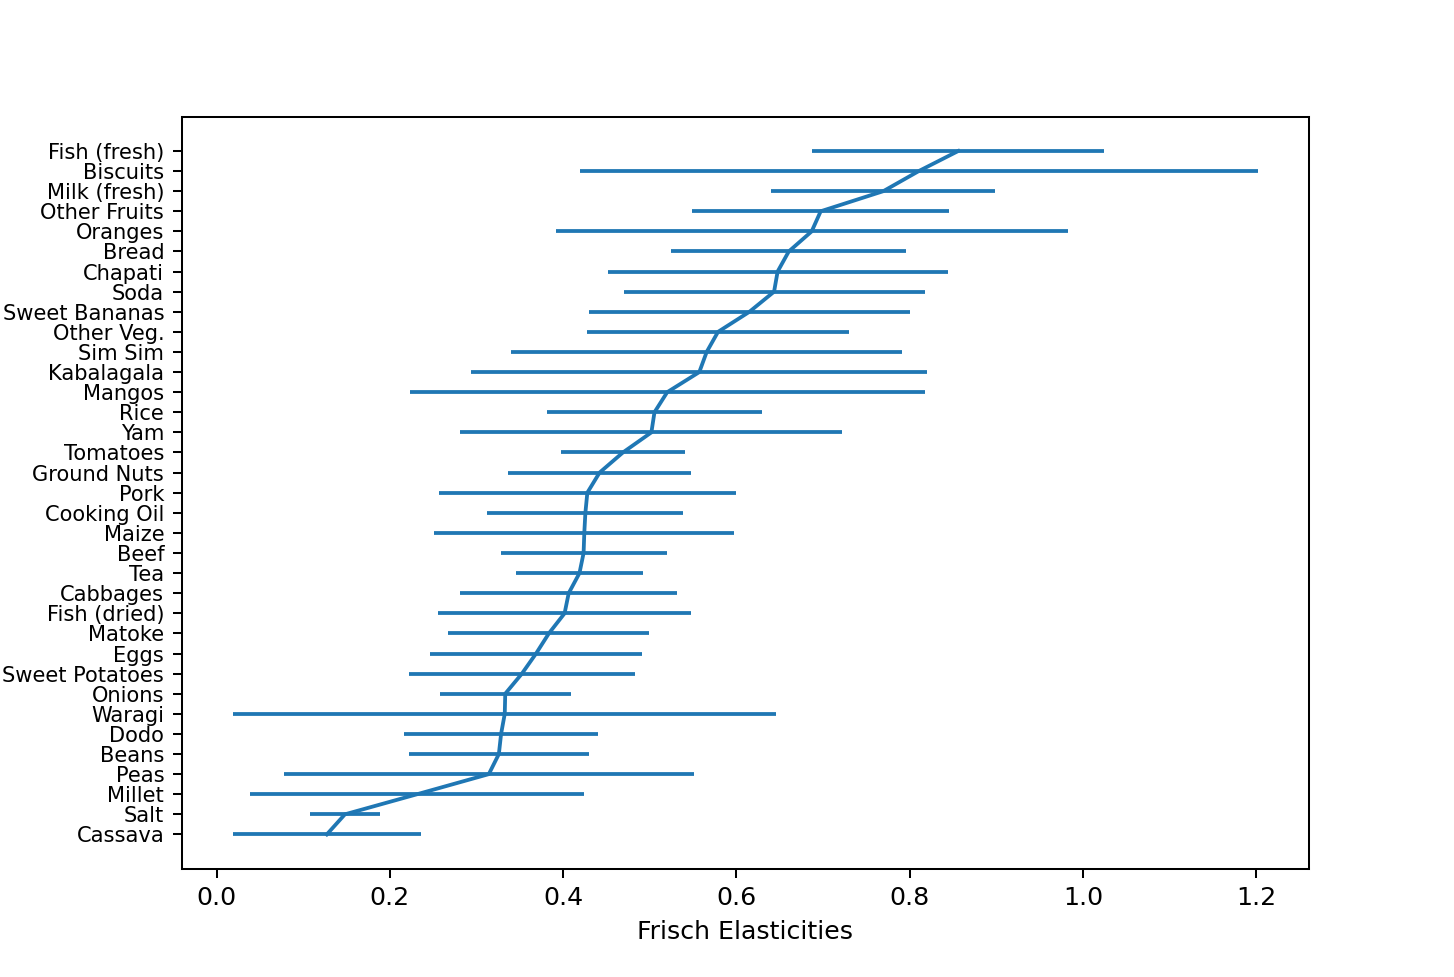

<IPython.core.display.Javascript object>


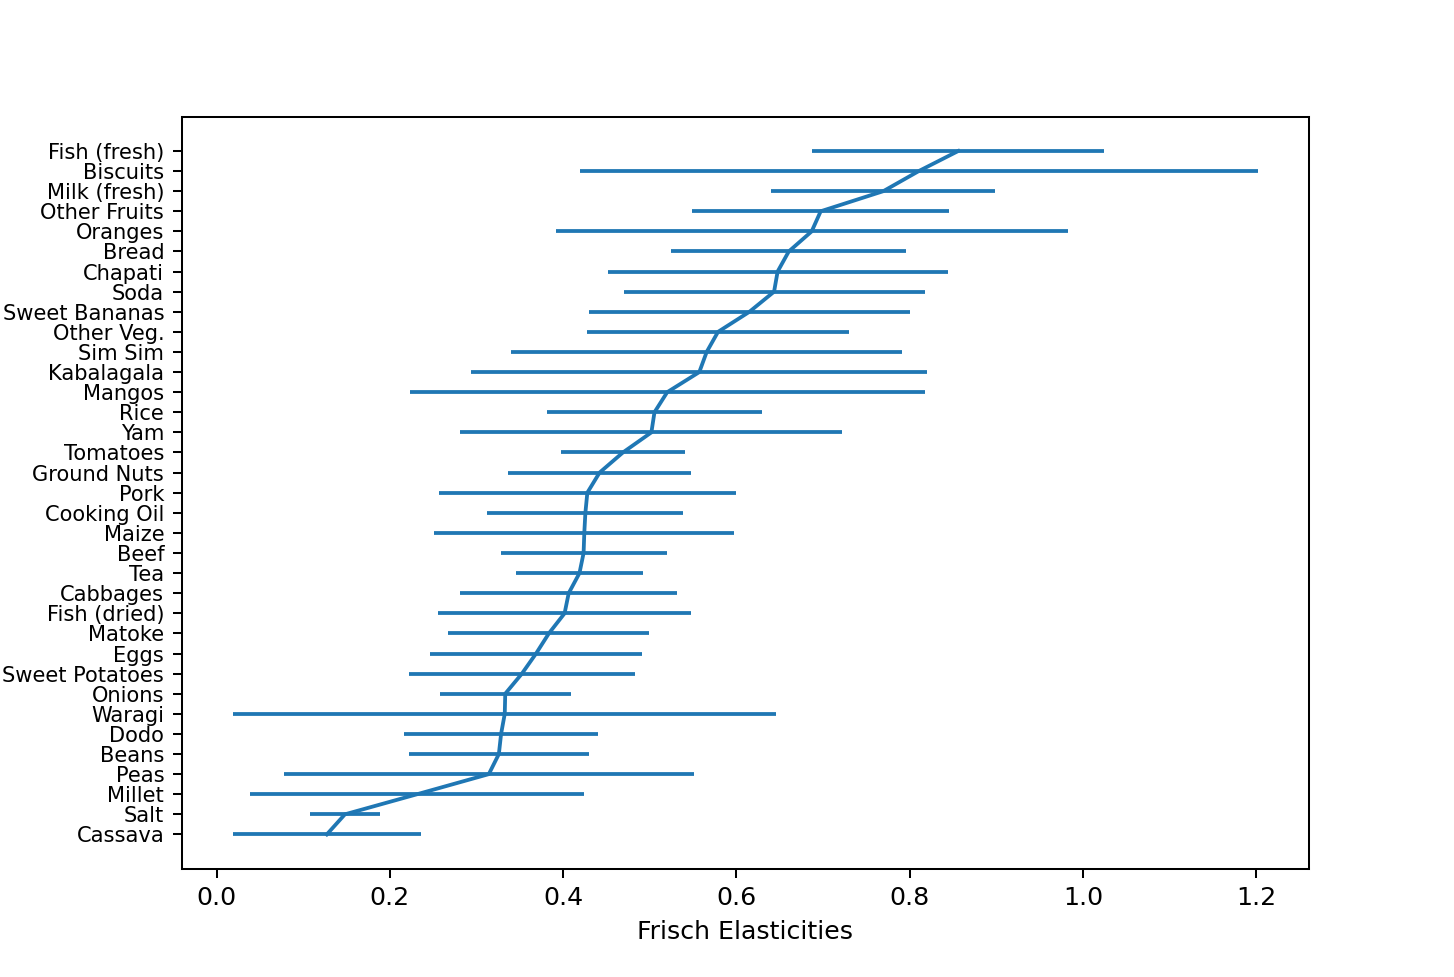

In [23]:
result.graph_beta()

In [24]:
result.gamma

k,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,log HSize,Constant
j,,,,,,,,,,,,,,,,
Beans,-0.124336,0.035231,0.090377,0.004499,-0.007870,0.022907,0.102685,-0.042510,0.022145,0.064256,0.063150,0.041227,0.011180,0.114473,0.391925,-0.765806
Beef,-0.133073,0.012580,0.015526,0.014861,0.082507,0.061304,0.189160,-0.042146,0.021119,-0.009366,0.048574,0.077610,0.170483,0.171712,0.252517,-0.676754
Biscuits,0.038606,-0.000608,-0.026963,0.101941,0.015177,0.244867,0.289385,0.243284,0.039812,-0.050499,-0.058406,0.046866,0.170904,-0.127918,-0.075380,-0.409758
Bread,-0.064686,0.027238,-0.092955,-0.008487,0.061894,0.057456,0.084374,-0.128560,0.073478,-0.041311,-0.019199,0.013019,0.074366,0.078168,0.398146,-0.751295
Cabbages,0.007378,-0.058572,0.029930,0.037955,-0.026252,0.036936,0.081504,-0.045031,0.033217,0.013162,0.042502,0.069609,0.030480,0.068790,0.232485,-0.513702
Cassava,0.019206,0.089485,0.105922,0.042049,-0.004145,0.072680,0.156273,-0.003705,0.134056,0.186236,0.135270,0.062836,0.098303,0.118365,0.148453,-0.711646
Chapati,-0.034054,-0.008517,0.065749,0.090993,0.023017,0.006971,-0.090070,0.007639,0.082807,-0.036377,-0.016584,0.067900,0.093947,0.153264,0.162986,-0.412577
Cooking Oil,-0.088741,-0.050446,-0.052850,0.011923,0.028813,0.017072,-0.079372,-0.086822,-0.083002,-0.041623,-0.007363,-0.034479,0.005265,0.052592,0.418256,-0.517449
Dodo,-0.083900,-0.011246,0.091461,0.040517,0.049264,0.073878,0.182246,-0.021156,0.021386,0.088145,-0.009156,0.044575,0.063169,0.162541,0.170590,-0.539539


In [25]:
result.to_pickle('my_estimates.pickle')